## Prediccion del precio del Bitcoin y ETH, utilizando la libreria Prophet de Facebook 

El historico de precio utilizados es de la exchange Bincance, dicho dataset es extraido de la pagina **www.cryptodatadownload.com/data/**

Para las predicciones se utiliza la libreria Prophet de facebook, cuya documentacion esta adjunta en el repositorio **www.facebook.github.io/prophet**

## Importamos las librerias correspondientes 

In [67]:
import pandas as pd  
from fbprophet import Prophet

In [68]:
btc= pd.read_csv('btc_price_binance.csv') 
btc.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1234,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,NaN
1235,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,NaN
1236,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,NaN
1237,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,NaN
1238,1.502928e+09,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN


## Importamos los datos del tiempo de la libreria pandas 

In [69]:
from pandas import to_datetime

La libreria prophet exige trabajar con dos columnas, una donde esta la fecha (ds) y otra donde este la caracteristica a predecir (y). La columna ds debe tener el formato esperado por pandas, idealmente AAAA-MM-DD

In [70]:
df=pd.DataFrame(btc.close) # Creamos el dataframe con los precios de cierre del btc
df.columns=['y'] # Creamos la columna y, que en este caso sera el precio
df['ds']=to_datetime(btc.date) # Creamos la columna con ds con la fechas, formato esperado por pandas 
df.reset_index( drop=True, inplace=True) # Reseteamos los datos
print(df.shape) 
df.head()

(1239, 2)


,y,ds
0,32221.92,2021-01-05
1,31988.71,2021-01-04
2,33000.05,2021-01-03
3,32178.33,2021-01-02
4,29331.69,2021-01-01


Ajuste del modelo y luego lo entrenamos, segun lo explicado en la libreria

Luego de varias predicciones se decidio tomar los datos apartir del año 2019, ya que el modelo tomaba los valores bajos de los años 2018 y 2017

In [71]:
df.loc[(df['ds'] < '2019-01-01'), 'y'] = None # Se toman los valores apartir del año 2019
m = Prophet(yearly_seasonality=True, daily_seasonality= True).fit(df)
#fig = m.plot(m.predict(future))

Se agrega al dataframe la cantidad de fechas a predecir 

In [72]:
future=m.make_future_dataframe(periods=31) 
future.tail() 

,ds
1264,2021-02-01
1265,2021-02-02
1266,2021-02-03
1267,2021-02-04
1268,2021-02-05


Se realiza la prediccion. Los datos predichos se encontraran en la columna de yhat, junto al los intervalos de incertidumbre

In [73]:
forecast=m.predict(future) 
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1264,2021-02-01,32808.580014,31793.371597,33830.647852
1265,2021-02-02,32977.558224,31932.303298,33984.566004
1266,2021-02-03,33181.796874,32151.547143,34159.787360
1267,2021-02-04,33312.876929,32247.144547,34432.400341
1268,2021-02-05,33528.069654,32462.043819,34633.326054


Se grafica los pronosticos que se obtuvieron

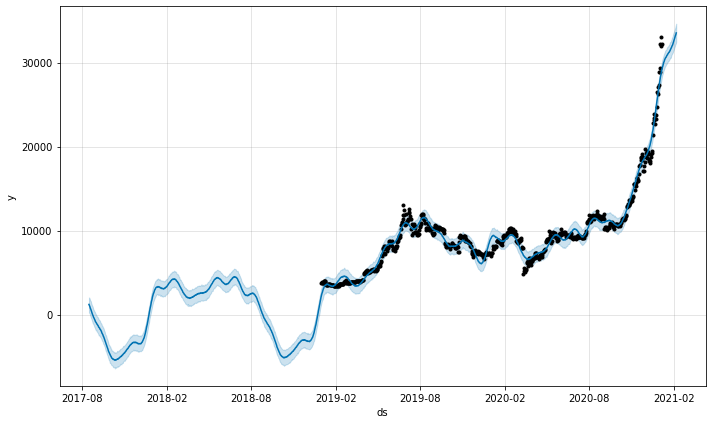

In [74]:
fig1=m.plot(forecast)

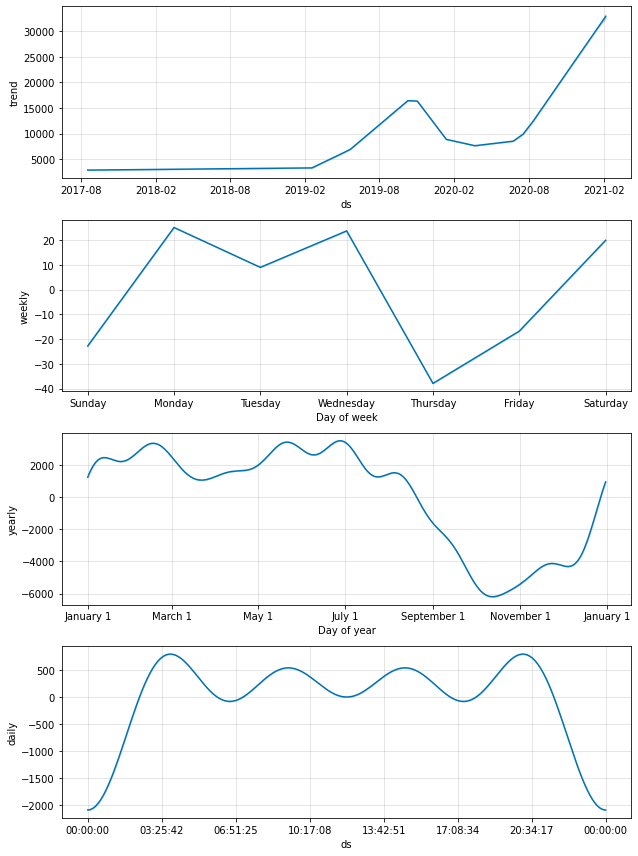

In [75]:
fig2=m.plot_components(forecast)

## Ethereum

In [76]:
eth= pd.read_csv('eth_price.csv') 
eth.tail()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
1234,1.503274e+09,2017-08-21,ETH/USDT,299.10,346.52,294.60,323.29,5134.54,1661944.36,NaN
1235,1.503187e+09,2017-08-20,ETH/USDT,290.91,300.53,282.85,299.10,2469.49,730800.66,NaN
1236,1.503101e+09,2017-08-19,ETH/USDT,293.96,299.90,278.00,290.91,2140.08,618248.58,NaN
1237,1.503014e+09,2017-08-18,ETH/USDT,302.00,311.79,283.94,293.96,9392.79,2815460.24,NaN
1238,1.502928e+09,2017-08-17,ETH/USDT,303.61,312.18,298.21,302.00,6155.32,1890017.53,NaN


In [77]:
df=pd.DataFrame(eth.close) # Creamos el dataframe con los precios de cierre del btc
df.columns=['y'] # Creamos la columna y, que en este caso sera el precio
df['ds']=to_datetime(eth.date) # Creamos la columna con ds con la fechas, formato esperado por pandas 
df.reset_index( drop=True, inplace=True) # Reseteamos los datos
print(df.shape) 
df.head()

(1239, 2)


,y,ds
0,1062.40,2021-01-05
1,1041.43,2021-01-04
2,978.28,2021-01-03
3,774.56,2021-01-02
4,728.91,2021-01-01


In [78]:
df.loc[(df['ds'] < '2019-01-01'), 'y'] = None
m = Prophet(daily_seasonality=True).fit(df)
#fig = m.plot(m.predict(future))

In [79]:
future=m.make_future_dataframe(periods=31) 
future.tail() 

,ds
1264,2021-02-01
1265,2021-02-02
1266,2021-02-03
1267,2021-02-04
1268,2021-02-05


In [80]:
forecast=m.predict(future) 
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1264,2021-02-01,911.690840,874.524063,952.255016
1265,2021-02-02,918.083056,878.415643,958.102859
1266,2021-02-03,923.835445,879.553015,963.868382
1267,2021-02-04,929.994802,887.885167,968.033586
1268,2021-02-05,939.321301,899.667017,977.627828


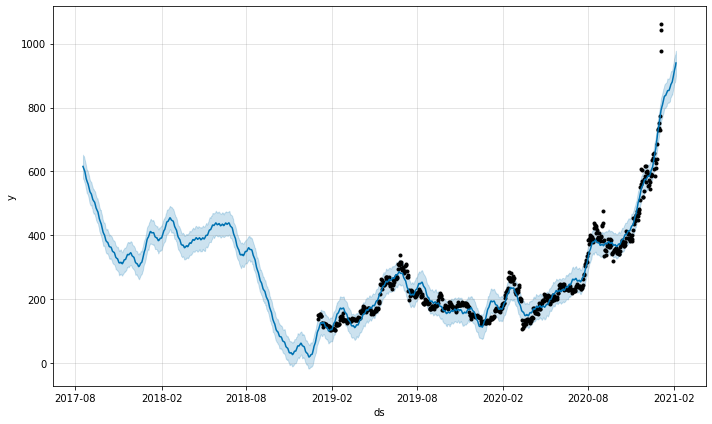

In [81]:
fig1=m.plot(forecast)

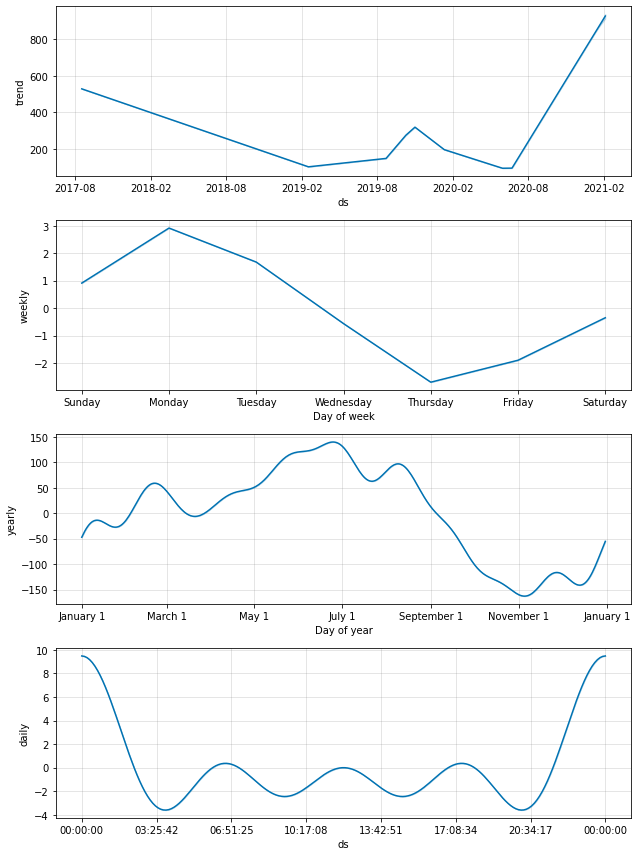

In [82]:
fig2=m.plot_components(forecast)

Analisis de la variacion del precio del btc cada una hora 

In [88]:
btc_h=pd.read_csv('btc_price_1h.csv')

In [89]:
btc_h.head() 

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1610323200000,2021-01-11 00:00:00,BTCUSD,38177.58,38297.56,37622.75,37741.46,62.5372254354
1,1610319600000,2021-01-10 23:00:00,BTCUSD,38466.99,38700.18,37944.98,38177.58,156.3951044829
2,1610316000000,2021-01-10 22:00:00,BTCUSD,38068.55,39079.59,37875.44,38466.99,103.8603453951
3,1610312400000,2021-01-10 21:00:00,BTCUSD,37725.35,38284.85,37522.00,38068.55,311.6043658704
4,1610308800000,2021-01-10 20:00:00,BTCUSD,37428.70,37734.38,34480.00,37725.35,1149.1791319376


In [92]:
df_h=pd.DataFrame(btc_h.Open) # Creamos el dataframe con los precios de cierre del btc
df_h.columns=['y'] # Creamos la columna y, que en este caso sera el precio
df_h['ds']=to_datetime(btc_h.Date) # Creamos la columna con ds con la fechas, formato esperado por pandas 
df_h.reset_index( drop=True, inplace=True) # Reseteamos los datos
print(df_h.shape) 
df_h.head()

(46113, 2)


,y,ds
0,38177.58,2021-01-11 00:00:00
1,38466.99,2021-01-10 23:00:00
2,38068.55,2021-01-10 22:00:00
3,37725.35,2021-01-10 21:00:00
4,37428.70,2021-01-10 20:00:00


In [93]:
m=Prophet() 
m.fit(df_h)

In [94]:
future = m.make_future_dataframe(periods=31)
future.tail()

,ds
46139,2021-02-07
46140,2021-02-08
46141,2021-02-09
46142,2021-02-10
46143,2021-02-11


In [95]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
46139,2021-02-07,28636.657139,22664.467624,35244.397308
46140,2021-02-08,28828.902779,22482.685579,35176.333891
46141,2021-02-09,28759.868916,22276.269056,35146.486860
46142,2021-02-10,28903.815595,22600.962727,34959.077670
46143,2021-02-11,28998.526281,22823.974787,35343.361923


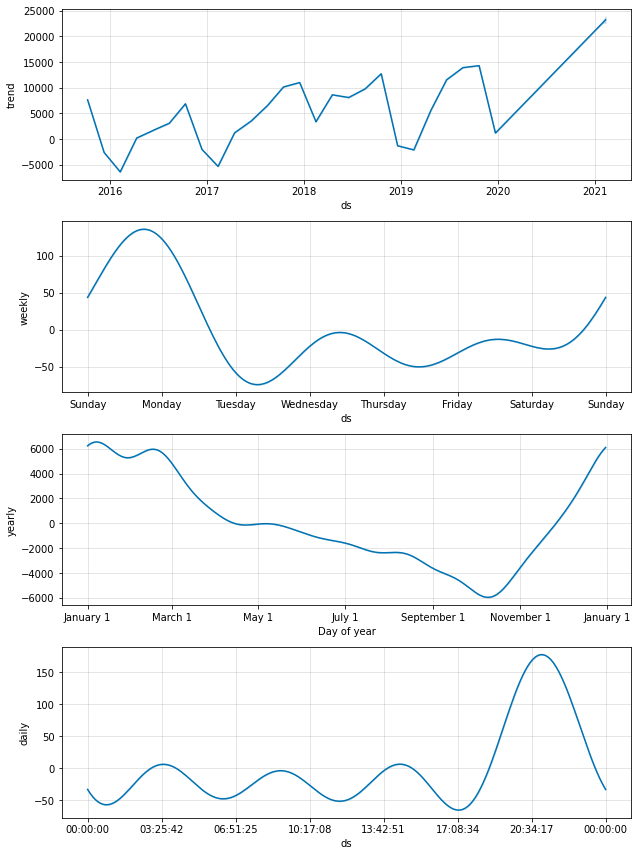

In [96]:
fig2 = m.plot_components(forecast)